In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import soundfile as sf
import os
import warnings
from glob import glob

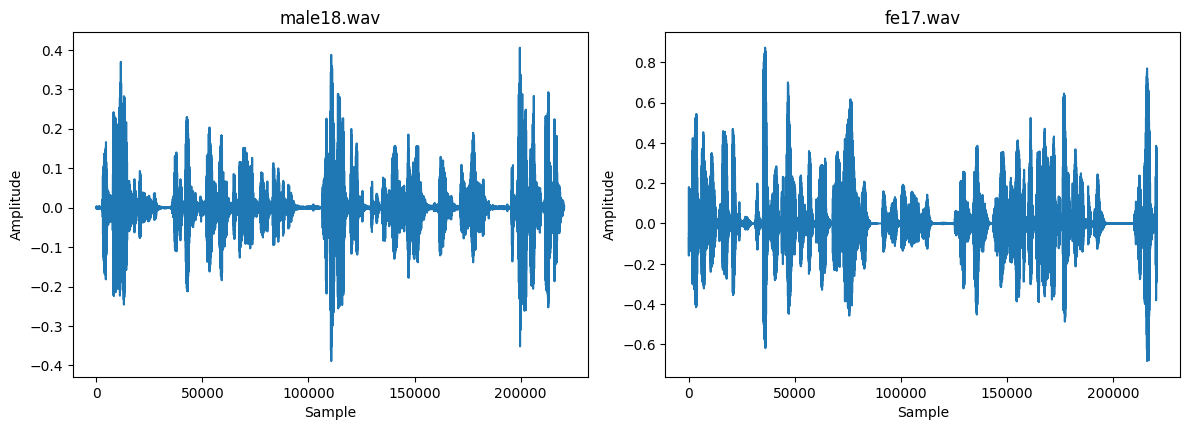

In [3]:
import os
import random
import librosa
import matplotlib.pyplot as plt

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store male and female file paths
male_files = []
female_files = []

# Iterate through the files in the folder and categorize them as male or female
for file_name in os.listdir(folder_path):
    if file_name.startswith("male"):
        male_files.append(os.path.join(folder_path, file_name))
    elif file_name.startswith("fe"):
        female_files.append(os.path.join(folder_path, file_name))

# Select two male and two female files at random
selected_files = random.sample(male_files, 1) + random.sample(female_files, 1)

# Visualize the selected audio files
plt.figure(figsize=(12, 8))
for i, file_path in enumerate(selected_files, 1):
    plt.subplot(2, 2, i)
    waveform, sample_rate = librosa.load(file_path)
    plt.plot(waveform)
    plt.title(os.path.basename(file_path))
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


---

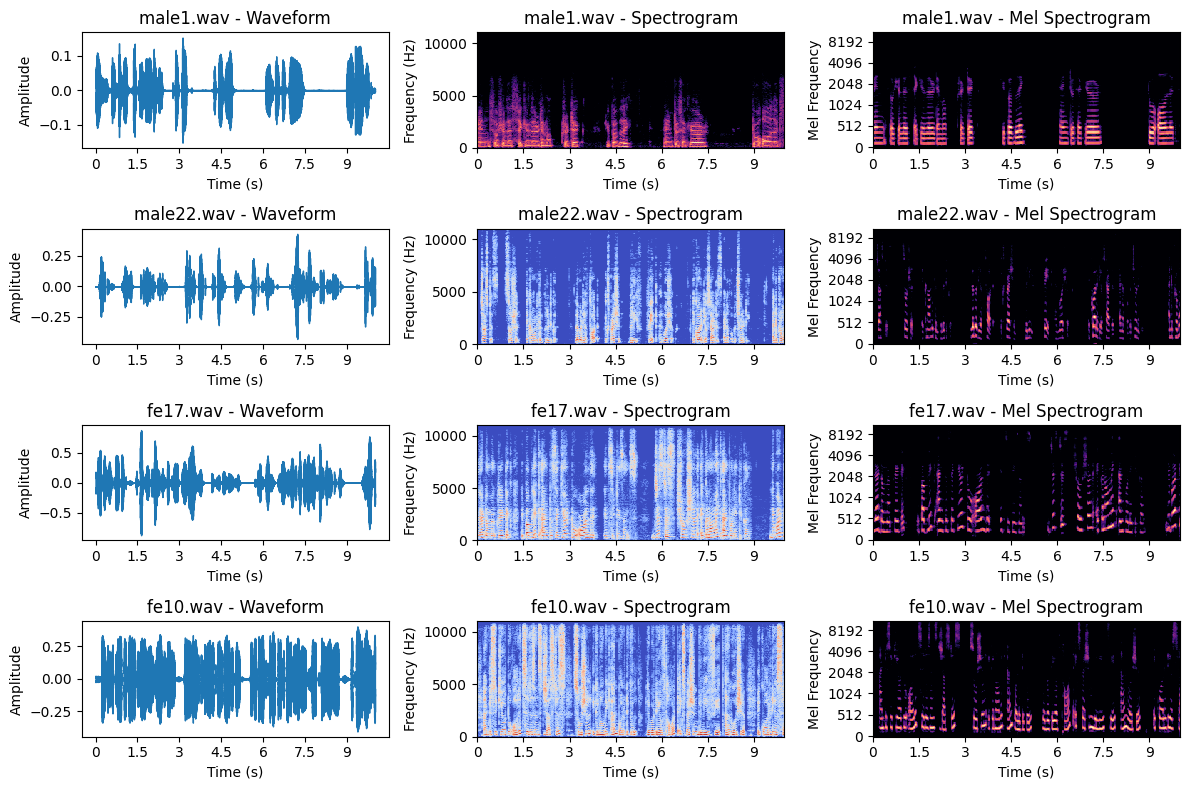

In [11]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store male and female file paths
male_files = []
female_files = []

# Iterate through the files in the folder and categorize them as male or female
for file_name in os.listdir(folder_path):
    if file_name.startswith("male"):
        male_files.append(os.path.join(folder_path, file_name))
    elif file_name.startswith("fe"):
        female_files.append(os.path.join(folder_path, file_name))

# Select two male and two female files at random
selected_files = random.sample(male_files, 2) + random.sample(female_files, 2)

# Visualize the selected audio files
plt.figure(figsize=(12, 8))
for i, file_path in enumerate(selected_files, 1):
    plt.subplot(4, 3, 3*i-2)
    waveform, sample_rate = librosa.load(file_path)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title(os.path.basename(file_path) + ' - Waveform')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(4, 3, 3*i-1)
    spec = librosa.stft(waveform)
    spec_db = librosa.amplitude_to_db(abs(spec))
    librosa.display.specshow(spec_db, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.title(os.path.basename(file_path) + ' - Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    plt.subplot(4, 3, 3*i)
    mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.title(os.path.basename(file_path) + ' - Mel Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Mel Frequency")

plt.tight_layout()
plt.show()


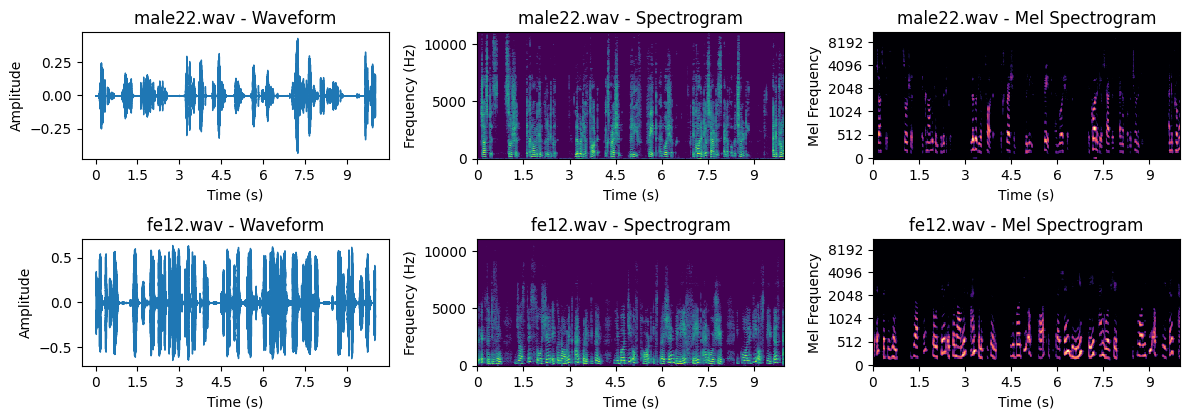

In [5]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store male and female file paths
male_files = []
female_files = []

# Iterate through the files in the folder and categorize them as male or female
for file_name in os.listdir(folder_path):
    if file_name.startswith("male"):
        male_files.append(os.path.join(folder_path, file_name))
    elif file_name.startswith("fe"):
        female_files.append(os.path.join(folder_path, file_name))

# Select two male and two female files at random
selected_files = random.sample(male_files, 1) + random.sample(female_files, 1)

# Define custom colormaps
cmap_spectrogram = 'viridis'  # Colormap for spectrogram
cmap_mel = 'magma'  # Colormap for mel spectrogram

# Visualize the selected audio files
plt.figure(figsize=(12, 8))
for i, file_path in enumerate(selected_files, 1):
    plt.subplot(4, 3, 3*i-2)
    waveform, sample_rate = librosa.load(file_path)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title(os.path.basename(file_path) + ' - Waveform')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(4, 3, 3*i-1)
    spec = librosa.stft(waveform)
    spec_db = librosa.amplitude_to_db(abs(spec))
    librosa.display.specshow(spec_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap=cmap_spectrogram)  # Use custom colormap
    plt.title(os.path.basename(file_path) + ' - Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    plt.subplot(4, 3, 3*i)
    mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel', cmap=cmap_mel)  # Use custom colormap
    plt.title(os.path.basename(file_path) + ' - Mel Spectrogram')
    plt.xlabel("Time (s)")
    plt.ylabel("Mel Frequency")

plt.tight_layout()
plt.show()


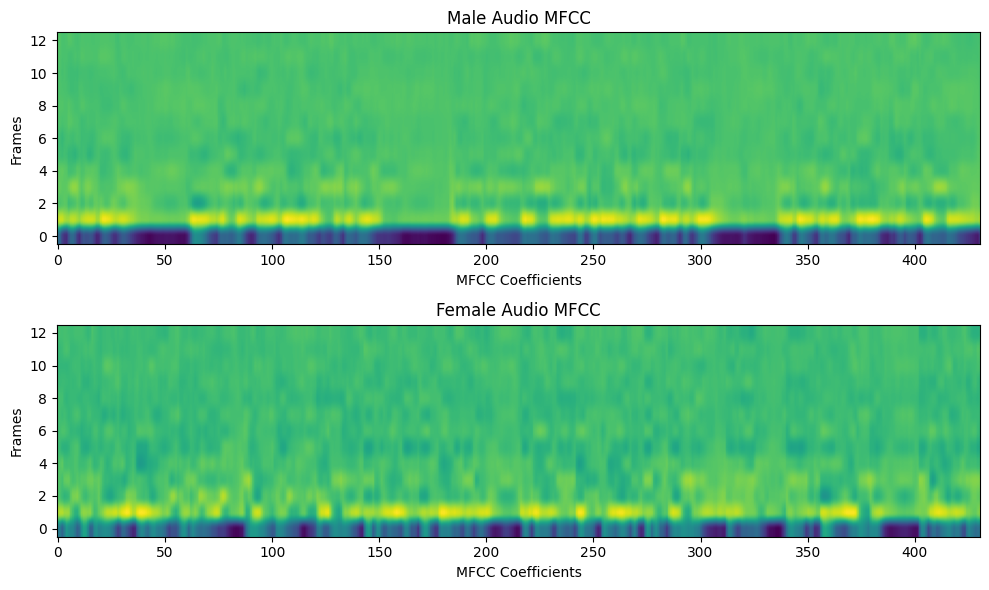

In [15]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store male and female audio files
male_audio_files = []
female_audio_files = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.startswith("male") and file_name.endswith(".wav"):
        male_audio_files.append(file_path)
    elif file_name.startswith("fe") and file_name.endswith(".wav"):
        female_audio_files.append(file_path)

# Randomly select one male and one female audio file
male_audio_file = np.random.choice(male_audio_files)
female_audio_file = np.random.choice(female_audio_files)

# Function to extract MFCC coefficients from an audio file
def extract_mfcc(audio_file):
    waveform, sample_rate = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13)
    return mfccs

# Extract MFCC coefficients for male and female audio files
male_mfcc = extract_mfcc(male_audio_file)
female_mfcc = extract_mfcc(female_audio_file)

# Plot MFCC coefficients
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(male_mfcc, cmap='viridis', origin='lower', aspect='auto')
plt.title('Male Audio MFCC')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Frames')

plt.subplot(2, 1, 2)
plt.imshow(female_mfcc, cmap='viridis', origin='lower', aspect='auto')
plt.title('Female Audio MFCC')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Frames')

plt.tight_layout()
plt.show()


---

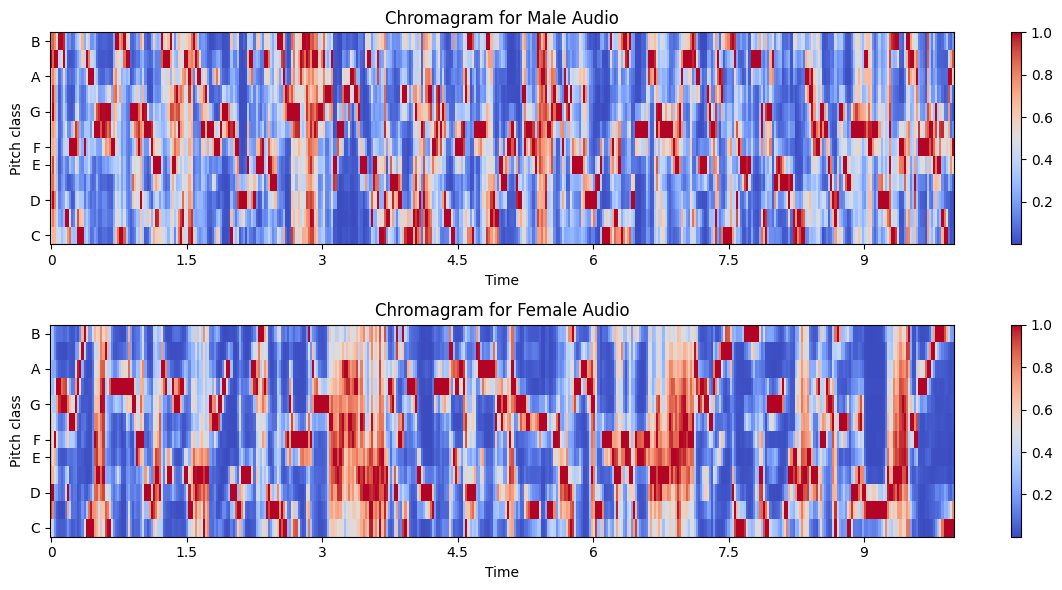

In [16]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing audio files
folder_path = "Data/Trimmed audios/All/"

# Lists to store male and female audio files
male_files = []
female_files = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_name.startswith("male") and file_name.endswith(".wav"):
        male_files.append(file_path)
    elif file_name.startswith("fe") and file_name.endswith(".wav"):
        female_files.append(file_path)

# Randomly select one audio file from each category
male_audio = np.random.choice(male_files)
female_audio = np.random.choice(female_files)

# Load the audio files
waveform_male, sample_rate_male = librosa.load(male_audio)
waveform_female, sample_rate_female = librosa.load(female_audio)

# Compute chromagram for male audio
chroma_male = librosa.feature.chroma_stft(y=waveform_male, sr=sample_rate_male)

# Compute chromagram for female audio
chroma_female = librosa.feature.chroma_stft(y=waveform_female, sr=sample_rate_female)

# Plot chromagrams
plt.figure(figsize=(12, 6))

# Plot chromagram for male audio
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_male, sr=sample_rate_male, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram for Male Audio')
plt.colorbar()

# Plot chromagram for female audio
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_female, sr=sample_rate_female, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram for Female Audio')
plt.colorbar()

plt.tight_layout()
plt.show()


In [2]:
pip install praat-parselmouth

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.9 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.1/8.9 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.2/8.9 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.2/8.9 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.4/8.9 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.4/8.9 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.9 MB 1.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.9 MB 1.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/8.9 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.9 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.9 MB 1.4 MB/s eta 0:00:06
   --- ----------

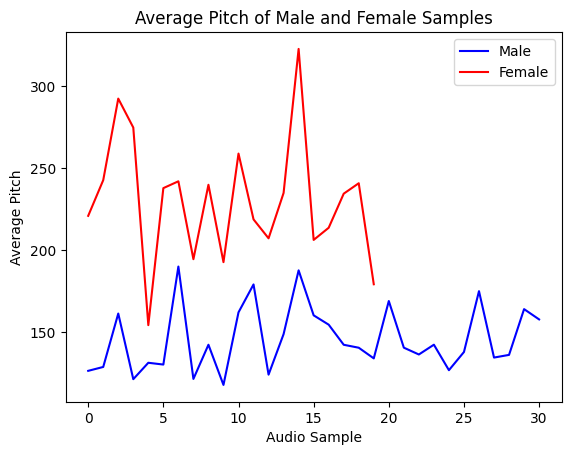

In [3]:
import parselmouth
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate pitch from audio file
def calculate_pitch(audio_file):
    snd = parselmouth.Sound(audio_file)
    pitch = snd.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    # Exclude unvoiced segments (pitch == 0)
    pitch_values = pitch_values[pitch_values > 0]
    return np.mean(pitch_values)

# Directory where audio files are stored
audio_folder = "Data/Trimmed audios/All/"

# Lists to store pitch values for males and females
male_pitches = []
female_pitches = []

# Iterate through audio files
for file in os.listdir(audio_folder):
    if file.startswith("male"):
        male_pitches.append(calculate_pitch(os.path.join(audio_folder, file)))
    elif file.startswith("fe"):
        female_pitches.append(calculate_pitch(os.path.join(audio_folder, file)))

# Plotting
plt.plot(range(len(male_pitches)), male_pitches, color='blue', label='Male')
plt.plot(range(len(female_pitches)), female_pitches, color='red', label='Female')
plt.xlabel('Audio Sample')
plt.ylabel('Average Pitch')
plt.title('Average Pitch of Male and Female Samples')
plt.legend()
plt.show()
